# **TC2-DS- Experiment 4**

*    **SIA VASHIST**
*    PRN: 20190802107


---

# **<U>AIM</U>** - To perform (EDA) exploratory data analysis operations on Haberman Cancer Survival dataset.

---

# **<U>DataSet Source</U>**: KAGGLE

---

#  **<u>LIBRARIES USED</u> :** 

> PANDAS |
> MATPLOTLIB |
> NUMPY |
> SEABORN 


---

# <u> Objective </u> :
>The purpose of this analysis is to predict a cancer patient's chances of surviving five years after the cancer has been detected, Through using patient's age, year of treatment, and the number of axil nodes (positive lymph nodes).

---
---

# <U> OPERATIONS </U> :

In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [23]:
#importing dataset
haberman_df = pd.read_csv(r'C:\sia\haberman.csv')
haberman_df.columns=['Age','Operation_Year','axil_nodes','Surv_Status']
print("The Dataset is as Follows:")
print(haberman_df.dropna(), '\n')

The Dataset is as Follows:
     Age  Operation_Year  axil_nodes  Surv_Status
0     30              62           3            1
1     30              65           0            1
2     31              59           2            1
3     31              65           4            1
4     33              58          10            1
..   ...             ...         ...          ...
300   75              62           1            1
301   76              67           0            1
302   77              65           3            1
303   78              65           1            2
304   83              58           2            2

[305 rows x 4 columns] 




# • High level statistics of the dataset:

a. Number of points, 
b. Number of features, 
c. Number of classes, 
d. Data-points per class.

In [24]:
#A & B. How many number of data-points and features?
print("The number of Points & Features are as follows: ")
print("Number of rows: " + str(haberman_df.shape[0]))
print("Number of columns: " + str(haberman_df.shape[1]))
print("Columns: " + ", ".join(haberman_df.columns))

The number of Points & Features are as follows: 
Number of rows: 305
Number of columns: 4
Columns: Age, Operation_Year, axil_nodes, Surv_Status


In [25]:
#C. How many number of classes?
print("The number of Classes are as follows: ")
print("Target variable distribution:")
print(haberman_df.iloc[:,-1].value_counts())
print("-"*100)
print(haberman_df.iloc[:,-1].value_counts(normalize = True))

The number of Classes are as follows: 
Target variable distribution:
1    224
2     81
Name: Surv_Status, dtype: int64
----------------------------------------------------------------------------------------------------
1    0.734426
2    0.265574
Name: Surv_Status, dtype: float64


In [26]:
#D. How many Datapoint per class?
#Surv_status: 1-Survived,2-Died
print("The Data-point per class are as follows: ")
haberman_df["Surv_Status"] = haberman_df["Surv_Status"].apply(lambda x: "Survived" if x == 1 else "Died")
haberman_df["Surv_Status"].value_counts()

The Data-point per class are as follows: 


Survived    224
Died         81
Name: Surv_Status, dtype: int64

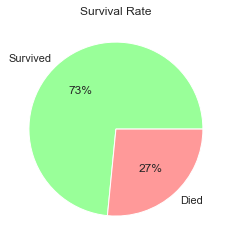

In [27]:
slices = haberman_df["Surv_Status"].value_counts()

plt.pie(x=slices, labels=["Survived", "Died"], colors=['#99ff99', '#ff9999'], autopct="%1.0f%%")
plt.title("Survival Rate")
plt.savefig("01. Survival rate.png")

plt.show()

In [28]:
#Descriptive Statistics
haberman_df.describe()

,Age,Operation_Year,axil_nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


# <u><i> Observations </i></u>:

>The dataset contains 305 data points and 4 features/variables.

>The dataset contains information on patients who underwent cancer surgery between the years 1958 and 1969 and were between the ages of 30 and 83 with the median of 52.

>Nearly 75% of the patients had 0–4 axil nodes, 25% had none, and just a small number had up to 52.

>In the dataset, there are 224 datapoints with the label "1" and 81 with the label "2," i.e., "Surv status:"1=Survived(the patient survived 5 years or longer)," and "2=Died(the patient died within 5 year)".

> We know that there are 224 instances of the patient surviving and 81 instances of the patient succumbing to the disease. We can conclude that our dataset is slightly imbalanced since ≈73% of data-points belong to class Survived and remaining ≈27% belong to class Died, which is a common observation in the case of medical records.


---

# • Univariate Analysis
A. PDF,
B. CDF,
C. Boxplot,
D. Violin plots

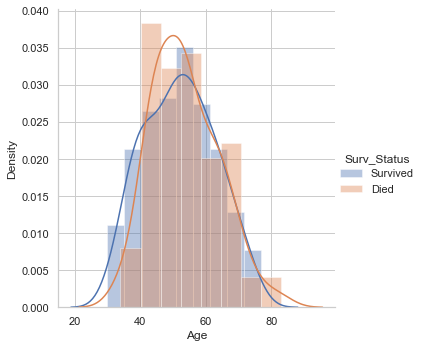

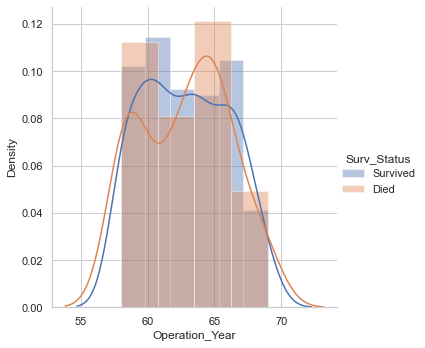

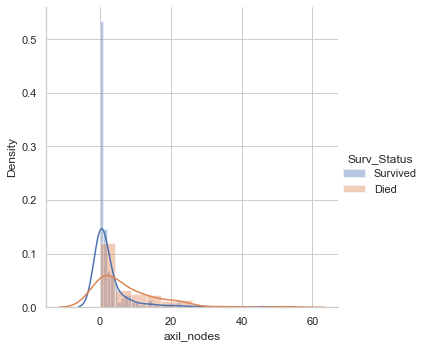

In [29]:

for idx, feature in enumerate(list(haberman_df.columns)[:-1]):
    fg = sns.FacetGrid(haberman_df, hue='Surv_Status', size=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

# <u><i>Observations</i></u> :
> 1. PDF for Age of Patient:
The PDF of survival status by age is strongly overlapping for both classes between the ages of 40 and 65, as can be shown (the area under the curves is almost equal).

The percentage of patients who have a survival status as yes and those who have a survival status as no are about equal between the ages of 40 and 65, so this characteristic is not suited for classification.

> 2. PDF for Year of Operation:
We can observe that between 1958 and 1968, there is a significant amount of overlap in the PDF for survival status according to year of operation for both classes.

The percentage of patients who had a survival status of yes and the percentage of patients who had a survival status of no were nearly equal between 1958 and 1968, hence this characteristic is also unfit for classification.

> 3. PDF for Number of Axillary Nodes:
We have the greatest likelihood of obtaining the best classification by using the PDF for the survival status based on the number of axillary nodes because it has the least overlap between the two label classes.


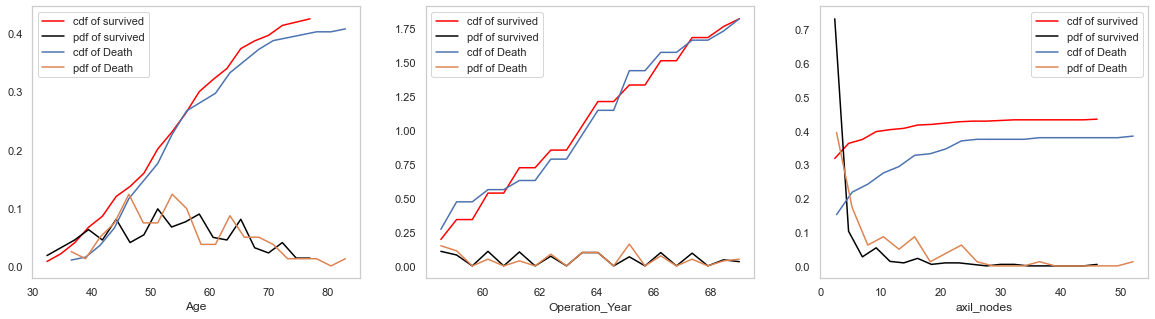

In [30]:
#A & B. PDF-CDF
Survived= haberman_df.loc[haberman_df["Surv_Status"]== "Survived"]
Died = haberman_df.loc[haberman_df["Surv_Status"]=="Died"]


plt.figure(figsize=(20,5))
i=1
for state in (list(haberman_df.columns)[:-1]):
#Survived
    plt.subplot(1,3,i)
    Counts , bin_edges = np.histogram(Survived[state],bins=20,density=True)
    pdf=Counts/sum(Counts)
    cdf = np.cumsum(Counts)
    plt.plot(bin_edges[1:],cdf,label="cdf of survived",color="red")
    plt.plot(bin_edges[1:],pdf,label="pdf of survived",color="black")
    
#Death
    Counts , bin_edges = np.histogram(Died[state],bins=20,density=True)
    pdf=Counts/sum(Counts)
    cdf = np.cumsum(Counts)
    plt.plot(bin_edges[1:],cdf,label="cdf of Death")
    plt.plot(bin_edges[1:],pdf,label="pdf of Death")
    plt.xlabel(state)
    plt.grid()
    plt.legend()
    i+=1
plt.show()


# <u> Observations </u>:
1) Those between the ages of 32 and 36 have unquestionably survived the operation, while patients between the ages of 77 and 85 have certainly not.

2) The year of operation cannot be used to determine the patient's outcome or survival status because the data for both cases are evenly distributed throughout the period of operation. It is reasonable to assume that the patient who had surgery between 1961 and 1965 had a significantly raised chance of surviving.

3) Additionally, it has been observed that patients with axil nodes <22 have a higher likelihood of surviving, and patients with 0–2 axil nodes have a greater chance of survival.

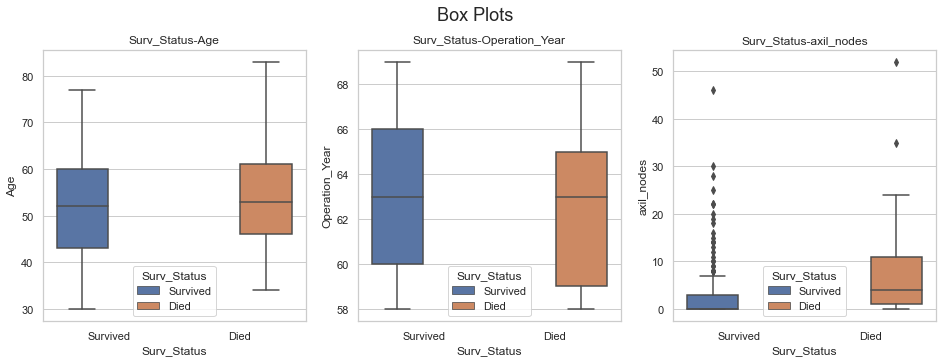

In [31]:
#C. BoxPlot
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
for idx, feature in enumerate(tuple(haberman_df.columns)[:-1]):
    sns.boxplot(x='Surv_Status',y=feature, hue="Surv_Status", data=haberman_df, ax=axes[idx]).set_title(str("Surv_Status-"+feature))
plt.suptitle("Box Plots",y=1.0, fontsize=18)
plt.show()

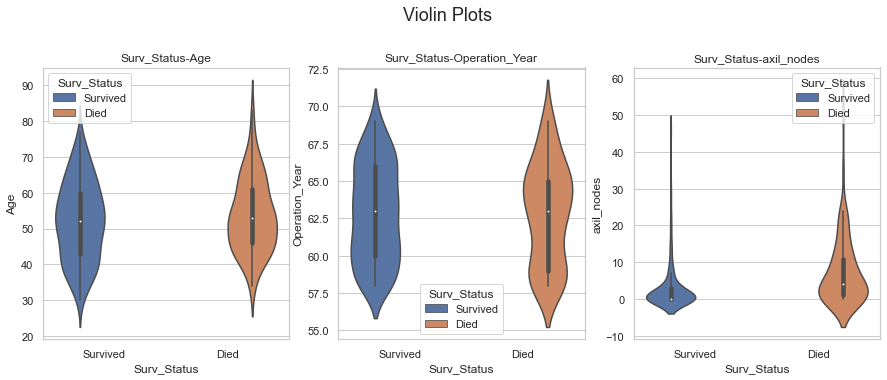

In [32]:
#D. ViolinPlot : Violin plot is the combination of box plot and probability density function.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(tuple(haberman_df.columns)[:-1]):
    sns.violinplot(x='Surv_Status',y=feature, hue="Surv_Status", data=haberman_df, ax=axes[idx]).set_title(str("Surv_Status-"+feature))
plt.suptitle("Violin Plots",y=1.05, fontsize=18)
plt.show()

# <u><i> Observations</i> </u>:

1) According to the PDF of the axil node, the survivors' axil numbers range from 0 to 5.

2) Less than or equal to five positive axil nodes are present in about 80% of cases.

3) Patients who were treated after 1966 have a somewhat higher chance of surviving than the other patients. Patients who were treated before 1959 have a somewhat worse likelihood of surviving than the other patients.

4) For the age and year parameters, the box plots and violin plots produce similar results with a significant overlap of data points. The overlap in the box plot and violin plot of nodes is less than in the other features, but it still exists, making it difficult to set a threshold to classify both groups of patients.


---

# • Bi-variate analysis 
A. scatter plots, B. pair-plots

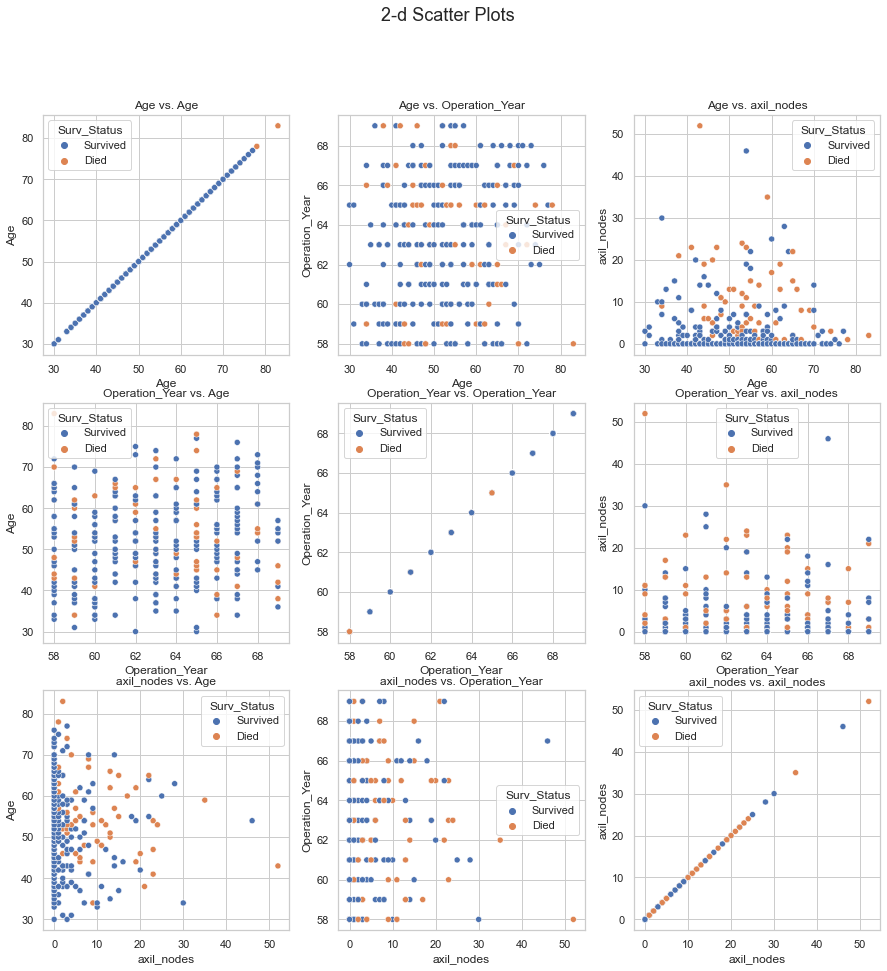

In [33]:
#A. Scatter Plots : 
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for idx, feature in enumerate(list(haberman_df.columns)[:-1]):
    for i, f in enumerate(list(haberman_df.columns)[:-1]):
        sns.scatterplot(x=feature, y=f, hue='Surv_Status', ax=axes[idx][i], data = haberman_df).set_title(str(feature+" vs. "+f))
plt.suptitle("2-d Scatter Plots", fontsize=18)
plt.show()

# <u><i> Observations </i></u>:

1. Less than five nodes are present in the majority of cases.
2. Patients who are younger than 40 have a better probability of survival and, in fact, have fewer nodes.
3. Less chance of survival exists for those with age over 50 and with nodes greater than 10.
4. More patients are between the ages of 40 and 65.

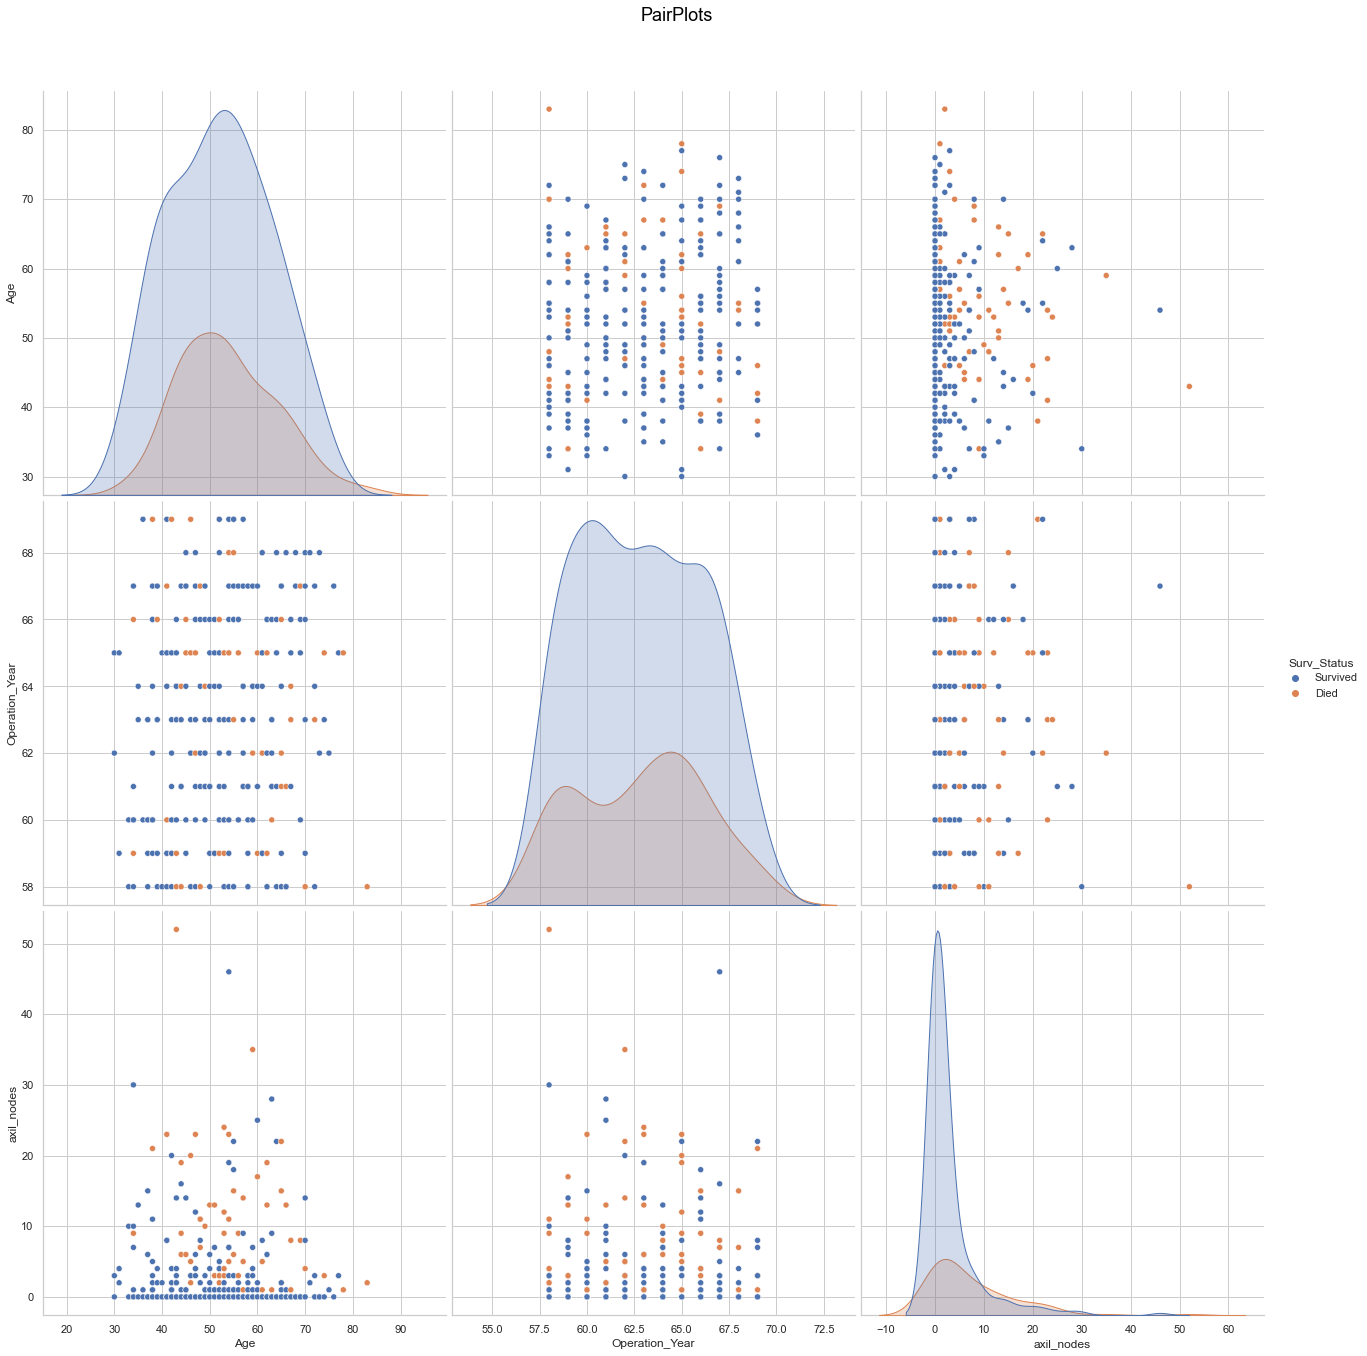

In [34]:
#B. Pair-Plot :Pair plot in seaborn plots the scatter plot between every two data columns in a given dataframe.
#              It is used to visualize the relationship between two variables

plt.close();
sns.set()
sns.set_style("whitegrid");
sns.pairplot(haberman_df, hue="Surv_Status", height=6)
plt.suptitle("PairPlots", y=1.05, fontsize = 18, color='black')
plt.show()

# <u><i>Observations</i></u>:

1) Age vs Year of Operation- Highly overlapping and thus discarded.

2) Year of Operation vs Number of Axillary Nodes-Highly overlapping and thus discarded.

3) Age vs Number of Axillary Nodes- Overlapping but better than the abovementioned cases. 

Thus, The Age of the patient and the Number of Axillary Nodes are the best features to predict the chances of survival 

---

# • Conclusion:
In conclusion, EDA (Exploratory Data Analysis) is used to analyse the Haberman Survival DataSet. The main objective was to effectively visualise and analyze the data on breast cancer survivability based on the patient's age, the year of operation, and the number of positive lymph nodes. We have found that the Node element helps to classify a patient's health more accurately, and patients with less nodes have a higher likelihood of survival. Middle-aged individuals represent the majority of the population (40-60). The fact that someone survived for less than or more than five years can be determined by other factors besides age.

___

---